In [1]:
import aihub

In [16]:
from aihub.core.data.dataclient import dc
from aihub.core.models.aihubmodel import AIModel
from keras.layers import Input, Dense
from keras.models import Model
from aihub.core.data.dataclient import dc
from aihub.core.data.dataclient import DenseDataset
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

class MLPMnist(AIModel):
    model = None

    def __init__(self):
        self.meta['name']='mlp-keras-mnist'
        self.meta['version'] = '1' #Must be generated automatically
        self.meta['usage']['input_shape']=[784]

    def build(self):
        self.model = Sequential([
            Dense(32, input_shape=(784,)),
            Activation('relu'),
            Dense(10),
            Activation('softmax'),
        ])
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return self.model

    def save(self):
        raise NotImplementedError()
    def load(self):
        raise NotImplementedError()
    def fit(self, ds, rebuild=True):
        (xtr,ytr),(xt,yt) = ds.load_data()
        if rebuild or self.model == None:
            self.model = self.build()
        ytr_ohe = keras.utils.to_categorical(ytr, num_classes=10)
        self.model.fit(x=xtr, y=ytr_ohe, batch_size=128, epochs=10)
        return self

    def predict(self, x, batch_size=0):
        return self.model.predict(x, batch_size)

In [17]:
ds = DenseDataset(dc.get_dataset('keras', 'mnist'))
m = MLPMnist().fit(ds)
(xtr, ytr), (xt, yt) = ds.load_data()

Epoch 1/10
60000/60000 [==============================] - 1s 15us/step - loss: 12.9011 - acc: 0.1990
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 9.5454 - acc: 0.4041
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 4.1599 - acc: 0.7376
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 3.9394 - acc: 0.7523
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 3.3070 - acc: 0.7904
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 2.8187 - acc: 0.8215
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 2.7177 - acc: 0.8280
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 2.5906 - acc: 0.8363
Epoch 9/10
60000/60000 [==============================] - 1s 14us/step - loss: 2.5504 - acc: 0.8390
Epoch 10/10
60000/60000 [==============================] - 1s 14us/step - loss: 2.5108 - acc: 0.841

In [18]:
i = np.random.choice(len(xt))

In [19]:
x = xt[i]

In [13]:
score = m.model.evaluate(xt, keras.utils.to_categorical(yt, num_classes=10), batch_size=128)

10000/10000 [==============================] - 0s 8us/step


In [23]:
print(x.reshape(784,).shape)

(784,)


7


Text(0.5,1,'Original')

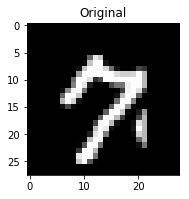

In [31]:
y = m.predict([[x.reshape(784,)]],batch_size=1)
print(np.argmax(y[0]))
plt.subplot(1, 2, 1)
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.title('Original')

# plt.subplot(1, 2, 2)
# plt.imshow(y.reshape(28, 28), cmap='gray')
# plt.title('Reconstructed')
#
# plt.show()
# (x_train, y_train), (x_test, y_test) = dc.get_dataset('keras','mnist')
